In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from decpomdp import DecPOMDP
import time
import random
import os
from constant import Constants
import gc 
gc.enable()


In [2]:
#set problem 
file_name = "broadcastChannel"
planning_horizon = 3
num_iterations = 3
sota_ = False
game_type = "zerosum"


problem = DecPOMDP(file_name,horizon=planning_horizon)
Constants.initialize(problem)
constant = Constants.get_instance()
from pbvi import PBVI
from experimentFunctions import Experiment
experiment = Experiment(planning_horizon,problem,algorithm="tabular")
print(f"game size :\n\t|S| = {len(problem.states)}")
print(f"\t|Z| = {problem.num_joint_observations}\n\t|U| = {problem.num_joint_actions} with |U_i| = {problem.num_actions[0]}")
print(f"intiial_belief : {problem.actions}")



game size :
	|S| = 4
	|Z| = 4
	|U| = 4 with |U_i| = 2
intiial_belief : [['send', 'wait'], ['send', 'wait']]


In [3]:
#see reward matrix of both player
print(f"REWARD MATRIX OF {game_type} {problem.name} GAME")
print("\nLeader :")
print(f"{pd.DataFrame(constant.REWARDS[game_type][0],columns=problem.states)}")
print("\nFollower :")
print(f"{pd.DataFrame(constant.REWARDS[game_type][1],columns=problem.states)}")



REWARD MATRIX OF zerosum broadcastChannel GAME

Leader :
   S00  S01  S10  S11
0  0.0  0.0  0.0  0.0
1  0.0  0.0  1.0  1.0
2  0.0  1.0  0.0  1.0
3  0.0  0.0  0.0  0.0

Follower :
   S00  S01  S10  S11
0 -0.0 -0.0 -0.0 -0.0
1 -0.0 -0.0 -1.0 -1.0
2 -0.0 -1.0 -0.0 -1.0
3 -0.0 -0.0 -0.0 -0.0


In [4]:
values,times ,tabular_value= experiment.run_single_experiment(density=0.00001,gametype="zerosum",limit=1000,sota=False,iterations=num_iterations)
values

			 Solving zerosum broadcastChannel GAME WITH SOTA False 3 
	belief expansion done, belief space size = 16

iteration : 1
========================= backup at timestep 2 =========================== 

Game zerosum  ::   tabular LP value : (0.0, 0.0)  --  reconstructed tabular alpha : (0.0, 0.0)  --  belief [0. 0. 0. 1.]  -- DR <decisionRule.DecisionRule object at 0x1231ba7d0>

Game zerosum  ::   tabular LP value : (0.0, 0.0)  --  reconstructed tabular alpha : (0.0, 0.0)  --  belief [0.09 0.01 0.81 0.09]  -- DR <decisionRule.DecisionRule object at 0x1232294e0>

Game zerosum  ::   tabular LP value : (0.0, 0.0)  --  reconstructed tabular alpha : (0.0, 0.0)  --  belief [0.  0.1 0.  0.9]  -- DR <decisionRule.DecisionRule object at 0x123250190>

Game zerosum  ::   tabular LP value : (0.0, 0.0)  --  reconstructed tabular alpha : (0.0, 0.0)  --  belief [0.  0.  0.9 0.1]  -- DR <decisionRule.DecisionRule object at 0x123272e00>

Game zerosum  ::   tabular LP value : (0.0, 0.0)  --  reconstructed 

[(0.620162932790224, -0.620162932790224),
 (0.620162932790224, -0.620162932790224),
 (0.620162932790224, -0.620162932790224)]

In [5]:
database, matrix = experiment.run_experiments_decreasing_density(num_iterations,initial_density=0.00001)
pd.DataFrame(database)

			 Solving cooperative broadcastChannel GAME WITH SOTA False 3 
iteration : 1 , density = 0.25
	belief expansion done, belief space size = 2

========================= backup at timestep 2 =========================== 

Game cooperative  ::   tabular LP value : (0.0, 0.0)  --  reconstructed tabular alpha : (0.0, 0.0)  --  belief [0. 0. 0. 1.]  -- DR <decisionRule.DecisionRule object at 0x1232a9840>

Game cooperative  ::   tabular LP value : (0.0, 0.0)  --  reconstructed tabular alpha : (0.0, 0.0)  --  belief [0.09 0.01 0.81 0.09]  -- DR <decisionRule.DecisionRule object at 0x123271060>

========== Backup done, veryfing calulations for next timestep backup ==========
========================= backup at timestep 1 =========================== 

Game cooperative  ::   tabular LP value : (1.0000000000000002, 1.0000000000000002)  --  reconstructed tabular alpha : (1.0000000000000002, 1.0000000000000002)  --  belief [0. 0. 0. 1.]  -- DR <decisionRule.DecisionRule object at 0x1232486d0>

Game 

,gametype,SOTA,horizon,iterations,time,number_of_beliefs,values,tabular value,density
0,cooperative,Stackelberg,1,3,"[0.09783315658569336, 0.332226037979126, 0.600...","[2, 6, 16]","[(2.0, 2.0), (2.0, 2.0), (2.0, 2.0)]",2,"[0.25, 0.125005, 1e-05]"
1,cooperative,Stackelberg,2,3,"[0.09812307357788086, 0.2936410903930664, 0.56...","[2, 6, 16]","[(2.0, 2.0), (2.0, 2.0), (2.0, 2.0)]",2,"[0.25, 0.125005, 1e-05]"
2,cooperative,Stackelberg,3,3,"[0.10004568099975586, 0.3036479949951172, 0.56...","[2, 6, 16]","[(2.0, 2.0), (2.0, 2.0), (2.0, 2.0)]",2,"[0.25, 0.125005, 1e-05]"
3,cooperative,State of the Art,1,3,"[0.008629798889160156, 0.029787063598632812, 0...","[2, 6, 16]","[(2.0, 2.0), (2.0, 2.0), (2.0, 2.0)]",2,"[0.25, 0.125005, 1e-05]"
4,cooperative,State of the Art,2,3,"[0.008131027221679688, 0.028955936431884766, 0...","[2, 6, 16]","[(2.0, 2.0), (2.0, 2.0), (2.0, 2.0)]",2,"[0.25, 0.125005, 1e-05]"
5,cooperative,State of the Art,3,3,"[0.00827479362487793, 0.029254913330078125, 0....","[2, 6, 16]","[(2.0, 2.0), (2.0, 2.0), (2.0, 2.0)]",2,"[0.25, 0.125005, 1e-05]"
6,zerosum,Stackelberg,1,3,"[0.1085669994354248, 0.3520660400390625, 0.679...","[2, 6, 16]","[(0.5236907730673317, -0.5236907730673317), (0...",2,"[0.25, 0.125005, 1e-05]"
7,zerosum,Stackelberg,2,3,"[0.15865302085876465, 0.36305999755859375, 0.6...","[2, 6, 16]","[(0.5236907730673317, -0.5236907730673317), (0...",2,"[0.25, 0.125005, 1e-05]"
8,zerosum,Stackelberg,3,3,"[0.10175204277038574, 0.32228517532348633, 0.6...","[2, 6, 16]","[(0.5236907730673317, -0.5236907730673317), (0...",2,"[0.25, 0.125005, 1e-05]"
9,zerosum,State of the Art,1,3,"[0.14232492446899414, 0.4531216621398926, 0.86...","[2, 6, 16]","[(0.5236907730673317, -0.5236907730673317), (0...",2,"[0.25, 0.125005, 1e-05]"


/Users/izzikampono/Documents/GitHub/Thesis/experimentFunctions.py:175: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = self.database[self.database["gametype"]==gametype][self.database["horizon"]==self.planning_horizon]
/Users/izzikampono/Documents/GitHub/Thesis/experimentFunctions.py:175: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = self.database[self.database["gametype"]==gametype][self.database["horizon"]==self.planning_horizon]
/Users/izzikampono/Documents/GitHub/Thesis/experimentFunctions.py:175: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = self.database[self.database["gametype"]==gametype][self.database["horizon"]==self.planning_horizon]


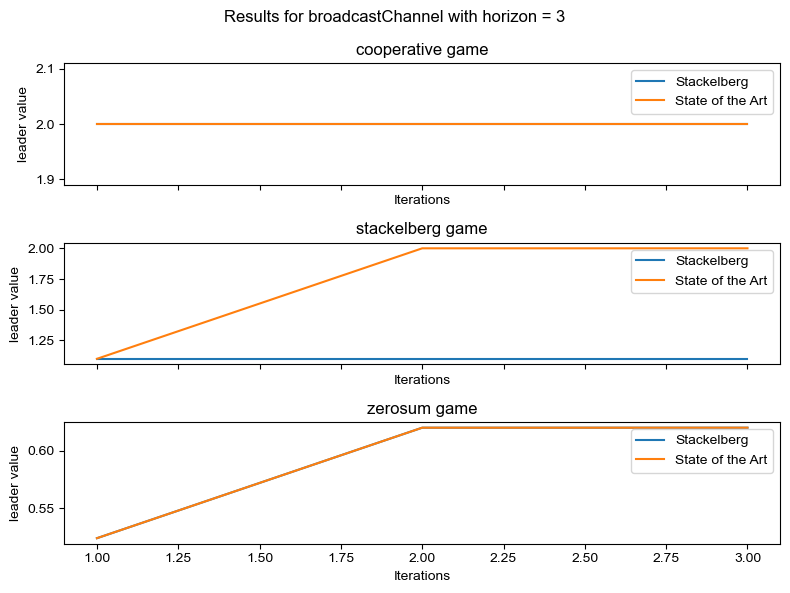

/Users/izzikampono/Documents/GitHub/Thesis/experimentFunctions.py:149: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = self.database[self.database["gametype"]==gametype][self.database["horizon"]==horizon]
/Users/izzikampono/Documents/GitHub/Thesis/experimentFunctions.py:149: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = self.database[self.database["gametype"]==gametype][self.database["horizon"]==horizon]
/Users/izzikampono/Documents/GitHub/Thesis/experimentFunctions.py:149: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = self.database[self.database["gametype"]==gametype][self.database["horizon"]==horizon]
/Users/izzikampono/Documents/GitHub/Thesis/experimentFunctions.py:149: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = self.database[self.database["gametype"]==gametype][self.database["horizon"]==horizon]
/Users/izzikampono/Documents/Git

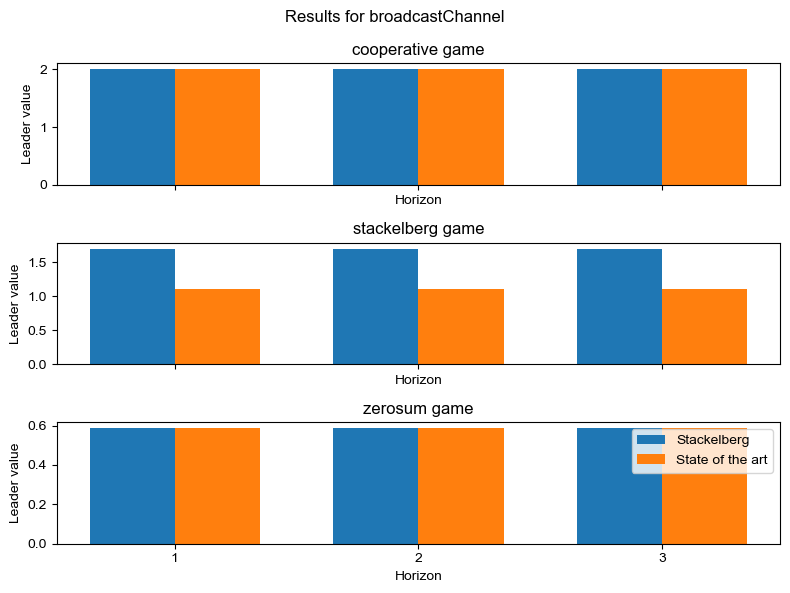

In [6]:
experiment.plots()
experiment.horizon_value_plot()

In [7]:
experiment.generate_summary_table()

/Users/izzikampono/Documents/GitHub/Thesis/experimentFunctions.py:206: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  current_data = self.database[self.database["SOTA"]==SOTA][self.database["horizon"]==horizon+1][self.database["gametype"]==gametype]
/Users/izzikampono/Documents/GitHub/Thesis/experimentFunctions.py:206: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  current_data = self.database[self.database["SOTA"]==SOTA][self.database["horizon"]==horizon+1][self.database["gametype"]==gametype]
/Users/izzikampono/Documents/GitHub/Thesis/experimentFunctions.py:206: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  current_data = self.database[self.database["SOTA"]==SOTA][self.database["horizon"]==horizon+1][self.database["gametype"]==gametype]
/Users/izzikampono/Documents/GitHub/Thesis/experimentFunctions.py:206: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  current_

{'cooperative':                     State of the Art                            PBVI  \
                                 time       value iteration      time   
 broadcastChannel(0)         0.067729  (2.0, 2.0)         3  0.600412   
 broadcastChannel(1)         0.068198  (2.0, 2.0)         3  0.564228   
 broadcastChannel(2)         0.067881  (2.0, 2.0)         3  0.569826   
 
                                            
                           value iteration  
 broadcastChannel(0)  (2.0, 2.0)         3  
 broadcastChannel(1)  (2.0, 2.0)         3  
 broadcastChannel(2)  (2.0, 2.0)         3  ,
 'zerosum':                     State of the Art                                           \
                                 time                                    value   
 broadcastChannel(0)         0.866172  (0.620162932790224, -0.620162932790224)   
 broadcastChannel(1)         0.844696  (0.620162932790224, -0.620162932790224)   
 broadcastChannel(2)         0.871383  (0.62016293279